<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Recommender-System-for-beer" data-toc-modified-id="Recommender-System-for-beer-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Recommender System for beer</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#KPI" data-toc-modified-id="KPI-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>KPI</a></span></li><li><span><a href="#The-predictor" data-toc-modified-id="The-predictor-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>The predictor</a></span><ul class="toc-item"><li><span><a href="#The-data" data-toc-modified-id="The-data-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>The data</a></span></li></ul></li><li><span><a href="#Production" data-toc-modified-id="Production-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Production</a></span></li></ul></li><li><span><a href="#Getting-started-with-the-RAMP-startting-kit" data-toc-modified-id="Getting-started-with-the-RAMP-startting-kit-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Getting started with the RAMP startting kit</a></span><ul class="toc-item"><li><span><a href="#Software-prerequisites" data-toc-modified-id="Software-prerequisites-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Software prerequisites</a></span></li><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Data visualization</a></span><ul class="toc-item"><li><span><a href="#File-Head" data-toc-modified-id="File-Head-1.2.4.1"><span class="toc-item-num">1.2.4.1&nbsp;&nbsp;</span>File Head</a></span></li><li><span><a href="#Rate-spreading" data-toc-modified-id="Rate-spreading-1.2.4.2"><span class="toc-item-num">1.2.4.2&nbsp;&nbsp;</span>Rate spreading</a></span></li><li><span><a href="#Impact-of-features-over-rating" data-toc-modified-id="Impact-of-features-over-rating-1.2.4.3"><span class="toc-item-num">1.2.4.3&nbsp;&nbsp;</span>Impact of features over rating</a></span></li></ul></li><li><span><a href="#Train-and-test-datasets" data-toc-modified-id="Train-and-test-datasets-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Train and test datasets</a></span></li></ul></li><li><span><a href="#Predictive-workflow" data-toc-modified-id="Predictive-workflow-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Predictive workflow</a></span></li><li><span><a href="#The-pipeline" data-toc-modified-id="The-pipeline-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>The pipeline</a></span><ul class="toc-item"><li><span><a href="#Feature-extractor" data-toc-modified-id="Feature-extractor-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Feature extractor</a></span></li><li><span><a href="#Classifier" data-toc-modified-id="Classifier-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Classifier</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Cross-Validation</a></span></li></ul></li><li><span><a href="#Local-testing-(before-submission)" data-toc-modified-id="Local-testing-(before-submission)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Local testing (before submission)</a></span></li></ul></li></ul></div>

# Recommender System for beer

<i>Philippe Burgelin, Côme Cothenet, Gauthier Perrod, Manuel Pichon</i>

## Introduction

Recommender systems are everywhere nowadays. From Netflix to Amazon threw retail, people are interested in applications that help them to find products they are susceptible to like and close to their interests. While some subjects like entertainment are on cutting edge technology for recommendation, some others could be developed more.

With the fast growing of technologies, digital contents are more and more accessible. On some platforms, it is possible to have access to a wide variety of media, without paying much. Users know there surely exists a music playlist they would love, nevertheless they can be lost in this "never ending world". This the reason why recommender systems are useful : the platform knows better than us what we love.

As an example of useful recommender system, we could cite Spotify, that dethroned Deezer into music streaming, thanks first to the wide available music, but also and principally thanks to its nice working recommender system. They developed three recommendation models : Collaborative filtering, Natural Language Processing and Raw Audio Models.

Concerning drink business, recommender systems for wine has a hard competition. It is due to the efficiency of objective measures of wine quality. This is not the case with beer. Nevertheless, beer is getting more and more trendy in Europe and America. A lot of people are now beer savvy : they are not looking for cheap beers, but beers to savour. Indeed, the production has neatly increased, and it has also grown in quality. Young students appreciate beer for its cheapness for parties, democratized by American movies, but in the mean time young adults prefer original beers, crafted, or even brewed by hand. There are more and more kit that give you the possibility to easily brew your own beer at home. The annual beer consummation in the world is 203 100 000 000 liters each years (yes, there is no mistake here, over 203 billion liters), enough to fill 81 240 Olympic pools with beer.


### KPI

**What do we want to predict? How will a good prediction improve a key performance indicator (KPI) or lead to a scientific result?**

First of all, we want to predict the note that a user would give to a beer. That means we would like to know what note would every user give to every beer. The predicted note goes from 0 - the user hates the beer- to 5 - the user loves the beer.

As an  example of KPI, considering a beer seller on internet, the more the beers they propose are adapted to the buyer, the more the buyer would come back and try new ones. This is a quite obvious KPI for this type of company.

Since it is a relatively new trend, it would be interesting to detect evolution of tastes through time and space. This would correspond to a science problem concerning the zythology.

**How do we measure the quality or value of the prediction in the selected business or science problem? What will be the quantitative score? How does the quantitative score reflect the quality or value of the prediction?**

The most crucial information for the company would be to give the correct approximation of the grade. The quantitative score would so be the RMSE. The closer the predicted note is to the real note, the better is the model. This measure helps us to "punish" the large residuals.

Then, our model could be relevant if it predicts better than the average value for each beer. Average grade per beer is public and this measure would tell us whether our recommendations are really personalized or not.

**How does the (possibly asymmetric) prediction error convert into cost or decreased KPI?**

As far as a better score gives a better buyer experience, a bad score would not decrease symmetrically. In fact, because we do not force the user to buy the beer we suggest to him, he can not be totaly disappointed by the seller. However, this would not make the shop better than its competitors and it would lead to a loss of market. As a comparison, we could cite Deezer and Spotify again : Spotify, thanks to its efficient recommender system, gets more and more subscribers and a "winner takes all" approach can be observed. With more than 92 millions subscribers, a large part of them decided to subscribe in order to discover new musics. As a counterpart, Deezer had a loss of market since Spotify knew best what users look for.

### The predictor

**Will the predictor be used as decision support, as a part of a fully automated system, or only as part of a report or feasibility study? How will an agent use the system?**

The predictor would be a part of a fully automated system. Marketing need fast solutions and the recommendation on the site would need it to be automated. However, as a science point of view, researchers would need to visualize the data obtained and work with them to create information and knowledge.

#### The data

\textbf{What data do we need to develop a predictor? Could you find this data? What were the actual data sources?}

The dataset we provide has been crawled from the website https://www.ratebeer.com. This site is known as one of the first beer notation site. Users from all around the world comment and note precisely beers. The crawling was made thanks to GraphQL and Scrappy (Python's library). This crawling allowed us to get three datatypes :

\begin{itemize}
    \item Information about user : 
        \begin{itemize}
            \item authorId
            \item users Surname : We will not keep this feature since we want to try to pseudonimize users as much as possible.
            \item authorReviewCOunt : number of notation in the entire site. It doesn't reflect our database since we didn't crawl the whole website for legal reasons.
        \end{itemize}
    \item Information about beers : 
        \begin{itemize}
            \item abv : the alcohol degree of the beer.
            \item averageRating : the average note of the beer.
            \item brewerId : the Id of the Brewer. This could help to predict the quality of the beer, since brewers have their own expertise that influence the taste of beers
            \item calories : this is calculated by ratebeer as a direct proportion of the degree.
            \item IBU : this corresponds to the bitterness of the beer. Only a few beers have a noted IBU. This is typically a measure that we miss in order to do some content-based filtering.
            \item ratingCount : number of users that have noted this beer.
            \item styleId : style of the beer, this can help a lot to predict the note, since a Stout is neatly different than a Lager.
            \item styleScore : score of the beer relative to all the beers in the same style.
        \end{itemize}
    \item Information about rating (more than 600,000) :
        \begin{itemize}
            \item authorId : id of the taster.
            \item score : true notation of the beer.
            \item scoresAppearance, scoresAroma, scoresFlavor, scoresMouthfeel, scoresOverall : notations of some detailed impressions of the user. scoresOverall is the total score of these detailed notations.
        \end{itemize}
\end{itemize}

**What other sources (private or public) could be exploited?**

We could improve easily our dataset with more scrapping on https://www.beerhawk.co.uk, https://www.saveur-biere.com or https://craftshack.com as a few examples on the web.

In order to increase the prediction score, we may need more information about content. Details about ingredients or objective measures like IBU (International Bitterness Unit) or SRM (Standard Reference Method - base of color measures) could lead to content-based filtering.
    
Some other data could come from shops' prices. In this way, it would be easier to study price elasticity, and consider a correlation in order to be more aggressive on the market.

**What were and would be the data collection costs?**

The collection cost was about 3.5 working days in order to find the correct solution, exploitable and reusable. Doing it with many websites doesn't scale linearly. Once the methodology is defined, it is much easier to scrape other sites, under the condition that they are not protected against scrapping. In this case, we would need to use Selenium (Python's library).

**What data cleaning/tidying steps were required to obtain clean training data?**

From the scrapped data, we needed to clean them in order to focus on the collaborative filtering goal. As described in the data part, many features were removed, because in reality, we would not get as much features for prediction.

###  Production

**Given the data source(s) and the prediction goal, what is the workflow and the workflow elements? Will you need different expertise for the different steps?**

As a business point of view, the help of expertise would be important in order to understand evolution and help improving the model. Determining the real KPI, and comparing the sells with the competitors is necessary to keep evolving. For example, finding the correct localisation in the website of the recommended beers would be crucial. This is the role of marketers and webdesigners, or Ramp projects ! 

![Workflow.jpg](Workflow.jpg)

The workflow would be determined in 4 steps : 
    \begin{itemize}
        \item User access to the API : By connecting to the application, it prints recommended beers and suggests the user
        \item Base dataset and collected grades impact the recommendation.
        \item Recommended beers are updated with the grades given by our target user
        \item Recommended beers are returned to the user, and we still have to measure how efficient the recommendation is.
    \end{itemize}


**How fast the phenomena underlying the prediction problem change? How often the model will have to be retrained? What are the associated costs and risks?**

The prediction could be Online, but it is not an absolute necessity. The model might have to be trained concerning a user every time he accesses the API. The cost are to collect and to train the model every time a user connects to the application. With a few data, it is relatively easy to do. However, it may be relevant to consider using Big Data Frameworks.
    We can note two types of costs : Software costs and Infrastructure cost, without considering the expertize cost :
    
Software Cost
\begin{itemize}
    \item Design and implementation of the system merged in the application
    \item Maintenance of the system
\end{itemize}
Infrastructure Cost
\begin{itemize}
    \item High Availability Server
    \item Big Data Framework infrastructure
\end{itemize}

## Getting started with the RAMP startting kit

### Software prerequisites

### Loading the data

### Exploratory Data Analysis

### Data visualization

In [18]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
df = pd.read_csv('full.csv')

#### File Head
First we open the files to see all the variable defined above.

In [3]:
df.head()

,Unnamed: 0,authorId,beerId,styleId,brewerId,abv,brewerName,beerName,mean_rating,rating
0,0,21543,451,118.0,799.0,8.0,La Trappe Trappist - Abdij O.L.V. Koningshoeve...,La Trappe Isid'or,3.741069,4.4
1,1,92269,451,118.0,799.0,8.0,La Trappe Trappist - Abdij O.L.V. Koningshoeve...,La Trappe Isid'or,3.741069,4.1
2,2,11041,451,118.0,799.0,8.0,La Trappe Trappist - Abdij O.L.V. Koningshoeve...,La Trappe Isid'or,3.741069,4.0
3,3,31108,451,118.0,799.0,8.0,La Trappe Trappist - Abdij O.L.V. Koningshoeve...,La Trappe Isid'or,3.741069,4.0
4,4,14970,451,118.0,799.0,8.0,La Trappe Trappist - Abdij O.L.V. Koningshoeve...,La Trappe Isid'or,3.741069,3.8


In [4]:
df['beerId'] = df['beerId'].astype('int64').astype('category')
df['brewerId'] = df['brewerId'].astype('category')
df['styleId'] = df.styleId.astype('int').astype('category')
df['brewerId'] = df.brewerId.astype('category')
try : 
    df = df.drop(columns='Unnamed: 0')
except KeyError : 
    pass

dummyStyle = df.pivot_table(index='authorId', columns='styleId', values='rating')

In [5]:
countRatingByBeer = pd.DataFrame(df.groupby(['beerId'])['rating'].count())
countRatingByBeer = countRatingByBeer.rename(columns={"rating":"count_rating"})

df = df.join(countRatingByBeer, on='beerId')

#Contains information about beers
dfBeer = df[['beerId', 'styleId', 'mean_rating', 'count_rating', 'abv', 'brewerId']].drop_duplicates()

In [6]:
dfBeer.head()

,beerId,styleId,mean_rating,count_rating,abv,brewerId
0,451,118,3.741069,1478,8.0,799.0
1478,243,13,3.778250,7200,8.5,247.0
8678,55,54,3.109412,170,4.0,18003.0
8848,449,118,3.621839,522,4.5,799.0
9370,574,80,4.282099,3821,11.3,406.0


In [7]:
dfBeer.describe()

,mean_rating,count_rating,abv
count,669.000000,669.000000,669.000000
mean,2.998749,735.218236,6.203184
std,0.585552,1028.357829,2.052546
min,1.244444,2.000000,0.000000
25%,2.659406,103.000000,4.900000
50%,3.096154,295.000000,5.800000
75%,3.411905,971.000000,7.500000
max,4.282099,7200.000000,16.000000


In [8]:
mean_rating = pd.DataFrame(df.groupby(['brewerId'])["rating"].mean())
mean_rating = mean_rating.rename(columns={"rating":"mean_rating"})

count_beer = pd.DataFrame(df.groupby(['brewerId'])["beerId"].nunique())
count_beer = count_beer.rename(columns={"beerId":"count_beer"})

dfBrewer = mean_rating.join(count_beer)

In [9]:
dfBrewer.head()

,mean_rating,count_beer
brewerId,,
9.0,2.112980,5
11.0,3.454300,7
12.0,3.815103,4
13.0,3.173217,9
26.0,1.834591,2


In [10]:
dfBrewer.describe()

,mean_rating,count_beer
count,176.000000,176.000000
mean,3.027409,3.801136
std,0.613034,3.392462
min,1.515321,1.000000
25%,2.712765,1.000000
50%,3.170009,2.500000
75%,3.454302,5.000000
max,4.120325,20.000000


#### Rate spreading
We first try to see how the grades are spread. We see that most of the grades are beetween 2.6 and 4.4. As shown by the boxplot, most of the scores are approximately the same. Only a very few beers are low-graded.

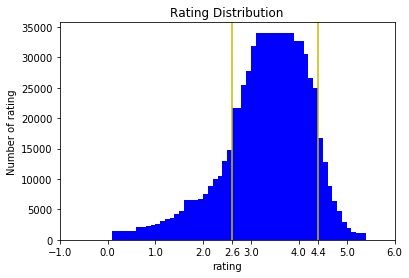

In [11]:
fig, ax = plt.subplots()
meanrating = df.groupby(['rating']).count()
plt.bar(pd.DataFrame(meanrating).index.values,
        pd.DataFrame(meanrating)['authorId'],
        color="blue")
plt.xlabel("rating")
plt.ylabel("Number of rating")
plt.title("Rating Distribution")
plt.axvline(2.6, color='y')
plt.axvline(4.4, color='y')
plt.xticks(list(plt.xticks()[0]) + [2.6, 4.4])
plt.show()

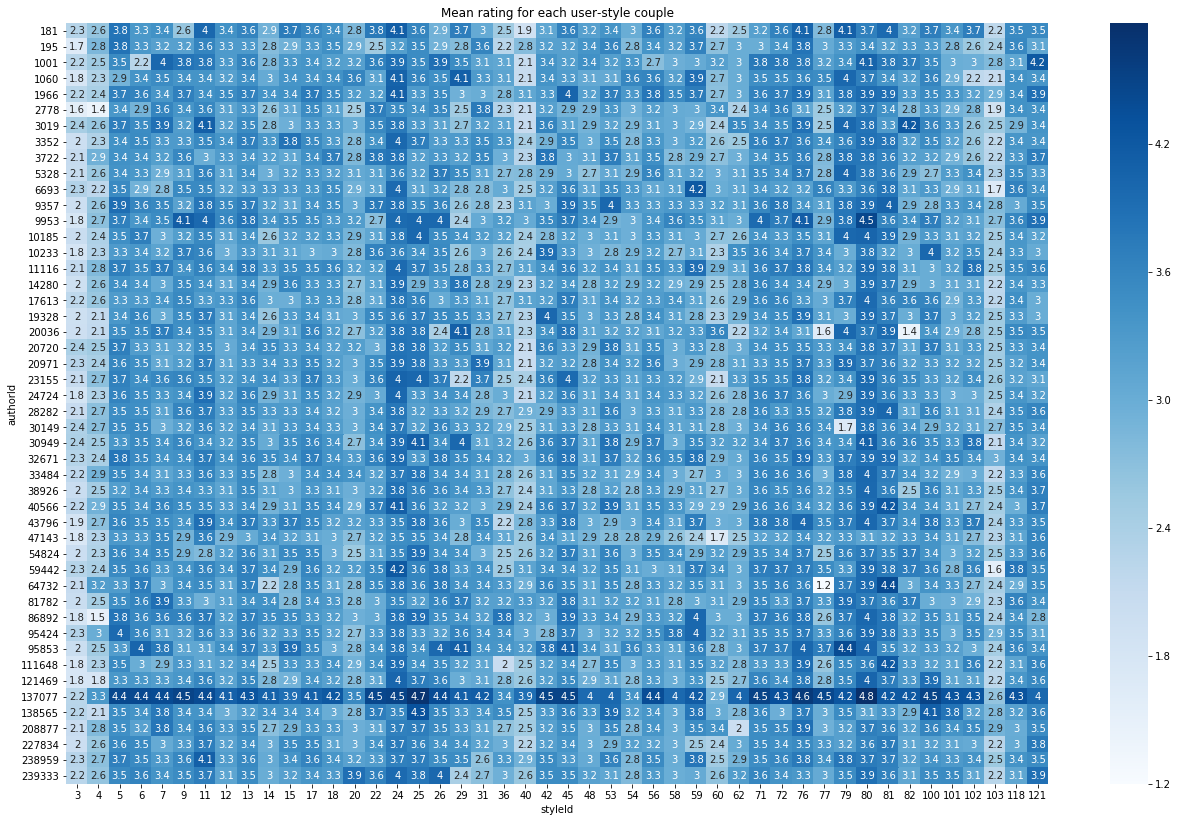

In [12]:
plt.figure(figsize=(22, 14))
sns.heatmap(dummyStyle.dropna(thresh=1200, axis=1).dropna(), cmap='Blues', annot=True)
plt.title('Mean rating for each user-style couple')
plt.show()

Based on some users, we can notice that some note styles with high mean, that is the case of user 137077. Some other are less tolerant (e.g. 20036). However, some styles are not at all liked by user, whatever can be their average rating. This is the case of style n°3 or n°103.

#### Impact of features over rating

##### Impact of ABV

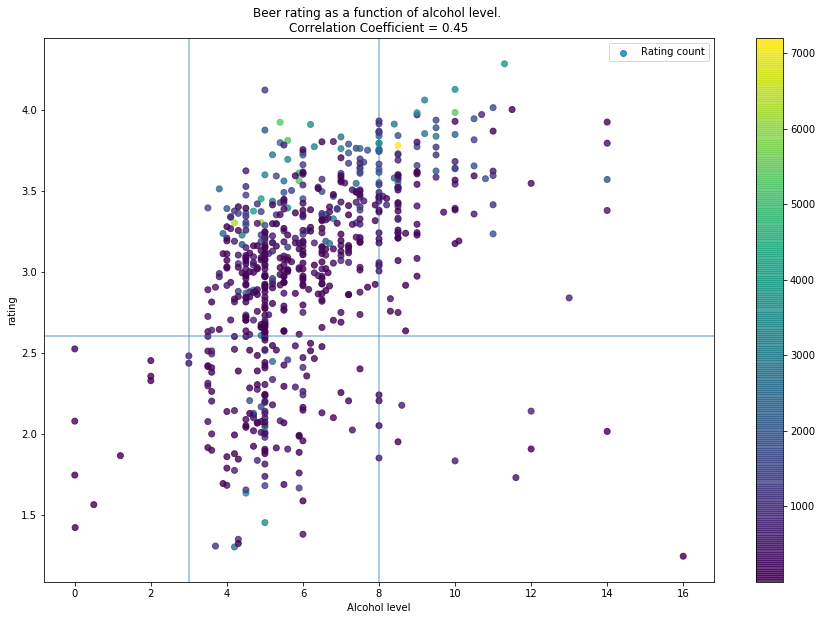

In [13]:
plt.figure(figsize=(15,10))
corrCoeff = dfBeer[['abv', 'mean_rating']].corr().iloc[1][0]
plt.scatter(dfBeer['abv'],
            dfBeer['mean_rating'],
            c=dfBeer['count_rating'],
            cmap=plt.cm.get_cmap('viridis'),
            label = "Rating count",
            alpha=0.8)
plt.xlabel("Alcohol level")
plt.ylabel("rating")
plt.title("Beer rating as a function of alcohol level. \n"
         + "Correlation Coefficient = {}".format(round(corrCoeff, 2)))
plt.axhline(2.6, alpha=0.5)
plt.axvline(3, alpha=0.5)
plt.axvline(8, alpha=0.5)
x =  np.arange(0,15)
plt.legend()
plt.colorbar()
plt.show()

It is quite known that a master part of the beer conception concerns its alcohol level, also known as ABV. The graph above shows the relatively high correlation coefficient of 0.45.

We can figure out that beers with low alcohol level are not well appreciated by users. Then, we concerning beers between 3 and 8 degrees, beers quality are more discussed, even if they are rather more appreciated. 
Finally, for high ABV beers, most of them get good ratings. Only a few are disliked, even if we can note that the 16° beer has a very low score.

##### Impact of beer style

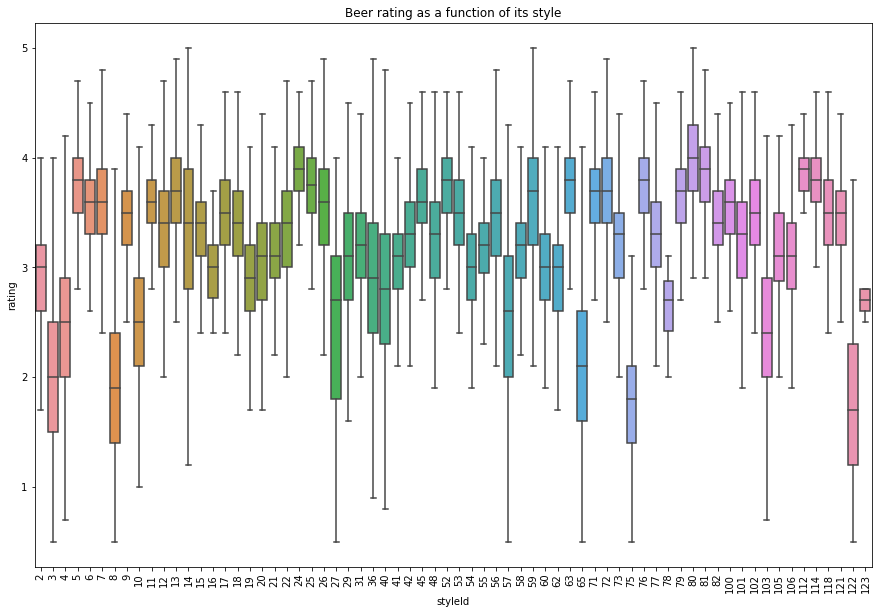

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(df.styleId, df.rating, fliersize=0)
plt.xticks(rotation='vertical', )
plt.title('Beer rating as a function of its style')
plt.show()

Beers that have the same style have approximately the same taste. Beer enthusiasts can find the difference between two beers looking similar, but it is not the case of every consummer. 

##### Repartition of ratings by quartile

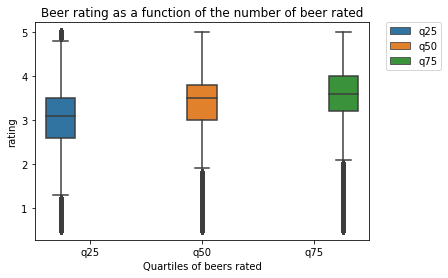

In [15]:
q_50 = df['count_rating'].quantile(0.5)
q_75 = df['count_rating'].quantile(.75)
q_25 = df['count_rating'].quantile(0.25)

df['quantile'] = ''

df.loc[df['count_rating'] >= q_75, 'quantile'] = 'q75'
df.loc[df['count_rating'] <= q_25, 'quantile'] = 'q25'
df.loc[df['quantile'] == '' , 'quantile'] = 'q50'

sns.boxplot(x='quantile', y='rating', data=df.sort_values('quantile'), hue='quantile')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Quartiles of beers rated')
plt.title('Beer rating as a function of the number of beer rated')
plt.show()

Users of our dataset tend to rate beers that they like rather than beers they hate.

#####  Biggest impacter between style or brewer

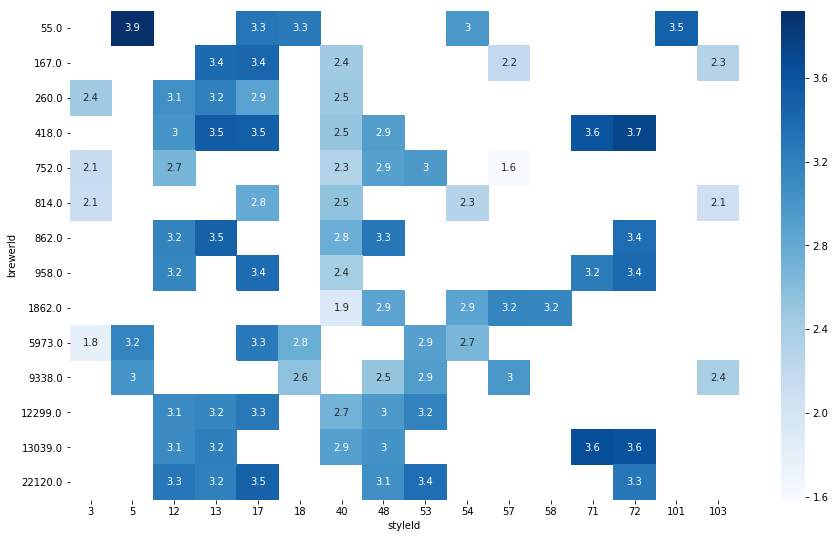

In [16]:
plt.figure(figsize=(15,9))
pivot = dfBeer.pivot_table(index='brewerId', columns='styleId', values='mean_rating')
pivot = pivot.dropna(thresh=10, axis=1).dropna(thresh=5, axis=0)
sns.heatmap(pivot, annot=True, cmap='Blues')

This graph shows the brewers that tried many styles, and styles tried by many brewers. A rating depends more on the style than on the brewer. For the style n° 40 as an example, it is not liked at all, while brewers may have better ratings for some other beers. Brewer 1862 didn't produce good beers for that style but has respectable scores for some other styles.

##### Impact of Brewer Style

Text(0.5,1,'Mean rating as a function of number produced beers')

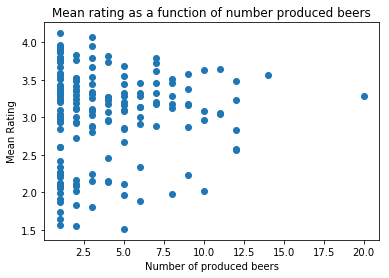

In [17]:
plt.scatter(dfBrewer.count_beer, dfBrewer.mean_rating)
plt.xlabel('Number of produced beers')
plt.ylabel('Mean Rating')
plt.title('Mean rating as a function of number produced beers')

### Train and test datasets

## Predictive workflow

## The pipeline 

### Feature extractor

### Classifier

### Cross-Validation

## Local testing (before submission)